<h1 id="tocheading">Table of Contents and Notebook Setup</h1>
<div id="toc"></div>

In [12]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
from scipy import misc
from scipy.optimize import curve_fit
import seaborn as sns
from IPython.display import display, HTML

# Read in the Data

In [14]:
df = pd.read_csv('https://github.com/sstangl/openpowerlifting-static/raw/gh-pages/openpowerlifting.csv.bz2')

C:\Users\lukep\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (34) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Print the Various Attributes

In [15]:
print(df.columns)

Index(['Name', 'Sex', 'Event', 'Equipment', 'Age', 'Division', 'BodyweightKg',
       'WeightClassKg', 'Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Squat4Kg',
       'Best3SquatKg', 'Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Bench4Kg',
       'Best3BenchKg', 'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg',
       'Deadlift4Kg', 'Best3DeadliftKg', 'TotalKg', 'Place', 'Wilks',
       'McCulloch', 'Tested', 'AgeClass', 'Country', 'Glossbrenner',
       'Federation', 'Date', 'MeetCountry', 'MeetState', 'MeetName'],
      dtype='object')


# Raw Tested Data

In [17]:
raw_tested = df[(df['Tested']=='Yes') & (df['Equipment']=='Raw')]

In [127]:
display(raw_tested.head())

,Name,Sex,Event,Equipment,Age,Division,BodyweightKg,WeightClassKg,Squat1Kg,Squat2Kg,...,McCulloch,Tested,AgeClass,Country,Glossbrenner,Federation,Date,MeetCountry,MeetState,MeetName
787,Becca Dison,F,SBD,Raw,19.0,Open,55.91,56,120.0,-125.0,...,419.64,Yes,18-19,USA,356.92,365Strong,2018-03-10,USA,NC,Enterprise Power Revolution
788,Andrea Fox,F,SBD,Raw,35.0,Open,67.22,67.5,102.5,-112.5,...,322.46,Yes,35-39,NaN,284.47,365Strong,2018-03-10,USA,NC,Enterprise Power Revolution
789,Candace Locklear,F,SBD,Raw,23.0,Open,74.66,75,137.5,145.0,...,378.96,Yes,24-34,NaN,333.41,365Strong,2018-03-10,USA,NC,Enterprise Power Revolution
791,Tara Peele,F,SBD,Raw,41.0,M1-Mst,73.66,75,102.5,110.0,...,310.78,Yes,40-44,USA,270.85,365Strong,2018-03-10,USA,NC,Enterprise Power Revolution
792,Kathryn French,F,D,Raw,26.0,Open,83.82,90,NaN,NaN,...,145.06,Yes,24-34,NaN,126.84,365Strong,2018-03-10,USA,NC,Enterprise Power Revolution


In [24]:
raw_tested_male = raw_tested[raw_tested['Sex']=='M']

Compare the bench press, squat, and deadlift of raw tested males.

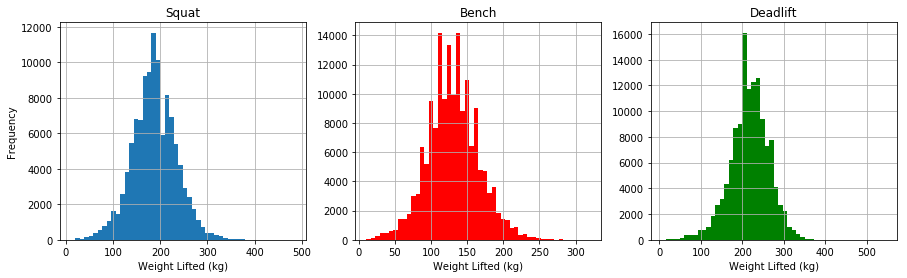

In [36]:
fig, ax = plt.subplots(1, 3, figsize=(15,4))

ax[0].hist(raw_tested_male['Best3SquatKg'][raw_tested_male['Best3SquatKg']>0], bins=50)
ax[1].hist(raw_tested_male['Best3BenchKg'][raw_tested_male['Best3BenchKg']>0], bins=50, color='r')
ax[2].hist(raw_tested_male['Best3DeadliftKg'][raw_tested_male['Best3DeadliftKg']>0], bins=50, color='g')

ax[0].grid()
ax[1].grid()
ax[2].grid()

ax[0].set_title('Squat')
ax[1].set_title('Bench')
ax[2].set_title('Deadlift')

ax[0].set_xlabel('Weight Lifted (kg)')
ax[1].set_xlabel('Weight Lifted (kg)')
ax[2].set_xlabel('Weight Lifted (kg)')

ax[0].set_ylabel('Frequency')

plt.show()

# Total Lifts as a Function of Weight

Only take data when lifter completed all three lifts.

In [62]:
raw_tested_male_all3 = raw_tested_male[(raw_tested_male['Best3SquatKg']>0) &
                                       (raw_tested_male['Best3BenchKg']>0) &
                                       (raw_tested_male['Best3DeadliftKg']>0)]

raw_tested_male_all3 = raw_tested_male_all3.dropna(subset=['BodyweightKg', 'TotalKg'])

Plot preliminary data.

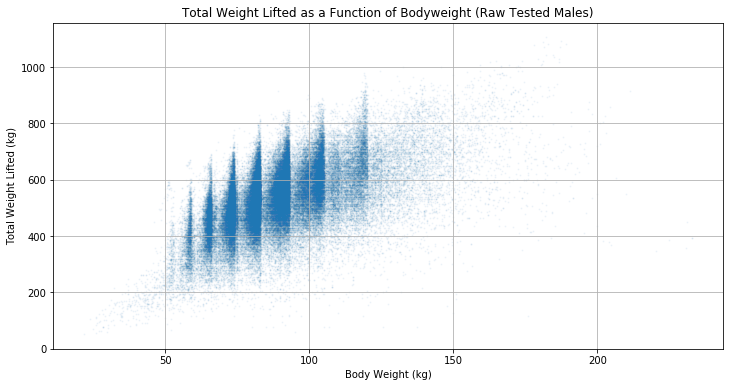

In [63]:
fig, ax = plt.subplots(figsize=(12,6))

ax.scatter(raw_tested_male_all3['BodyweightKg'], raw_tested_male_all3['TotalKg'], alpha=0.05, s=1)
ax.set_ylabel('Total Weight Lifted (kg)')
ax.set_xlabel('Body Weight (kg)')

ax.set_title('Total Weight Lifted as a Function of Bodyweight (Raw Tested Males)')
ax.grid()

plt.show()

## Do Some Curve Fitting

In [64]:
bw = np.array(raw_tested_male_all3['BodyweightKg'].dropna())
lw = np.array(raw_tested_male_all3['TotalKg'].dropna())

In [123]:
def func(x, a, b):
    return a+b*x

popt, pcov = curve_fit(func, np.log(bw), lw)
a_log, b_log = popt[0], popt[1]

popt, pcov = curve_fit(func, bw, lw)
a_lin, b_lin = popt[0], popt[1]

In [124]:
x = np.linspace(0, 250, 1000)

C:\Users\lukep\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


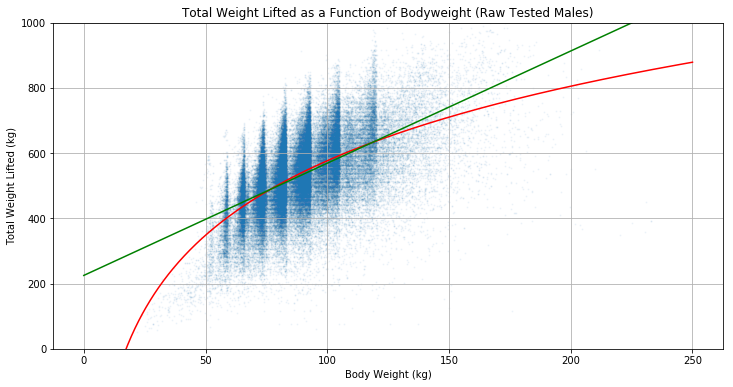

In [126]:
fig, ax = plt.subplots(figsize=(12,6))

ax.scatter(raw_tested_male_all3['BodyweightKg'], raw_tested_male_all3['TotalKg'], alpha=0.05, s=1)
ax.set_ylabel('Total Weight Lifted (kg)')
ax.set_xlabel('Body Weight (kg)')
ax.plot(x, a_log+b_log*np.log(x), color='r')
ax.plot(x, a_lin+b_lin*x, color='g')

ax.set_title('Total Weight Lifted as a Function of Bodyweight (Raw Tested Males)')
ax.set_ylim(0, 1000)
ax.grid()

plt.show()

In [5]:
inter82 = inter[inter['WeightClassKg']=='82.5']
inter100 = inter[inter['WeightClassKg']=='100']
inter110 = inter[inter['WeightClassKg']=='110']

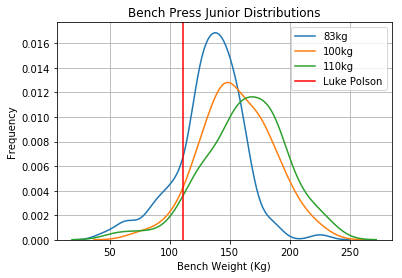

In [6]:
fig, ax = plt.subplots(figsize=(6,4))

sns.distplot(inter82['Best3BenchKg'][inter82['Best3BenchKg']>0], bins=100, ax=ax, hist=False, label='83kg')
sns.distplot(inter100['Best3BenchKg'][inter100['Best3BenchKg']>0], bins=100, ax=ax, hist=False, label='100kg')
sns.distplot(inter110['Best3BenchKg'][inter110['Best3BenchKg']>0], bins=100, ax=ax, hist=False, label='110kg')

ax.set_xlabel('Bench Weight (Kg)')
ax.set_ylabel('Frequency')
ax.set_title('Bench Press Junior Distributions')

ax.axvline(111.36, label='Luke Polson', color='r')
ax.legend()
ax.grid()
plt.show()

/Users/lukepolson/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


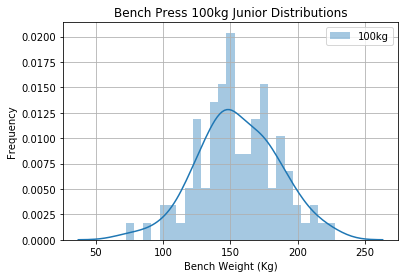

In [9]:
fig, ax = plt.subplots(figsize=(6,4))

sns.distplot(inter100['Best3BenchKg'][inter100['Best3BenchKg']>0], bins=25, ax=ax, label='100kg')

ax.set_xlabel('Bench Weight (Kg)')
ax.set_ylabel('Frequency')
ax.set_title('Bench Press 100kg Junior Distributions')

ax.legend()
ax.grid()
plt.show()